# Higher or Lower: Genetic Algorithm

"Guess a number between 1 and 100" ... "no it's higher than that" ... "no it's lower than that" ... "yes you got it!"
We all know this game of higher or lower and it's pretty easy to work out the best strategy for guessing the number as quickly as possible - namely you want to guess halway between the bounds each time. Here we'll see if we can get a computer to work that out for itself... using a genetic algorithms.

## Have a go
First of all have a go at the game yourself:

In [1]:
import gameClassPractice as HOL
import matplotlib.pyplot as plt
import numpy as np

In [2]:
game = HOL.Game()
game.playGame()

Pick a number between 1 and 100:
50
Nope. You need to go lower.
Pick a number between 1 and 49:
25
Nope. You need to go higher.
Pick a number between 26 and 49:
40
YES! CONGRATULATIONS! THE NUMBER WAS  40
You got the answer correct after 3 guesses.


How did you do?

# Let the computer have a go

It is not too hard to write a programme that will play the game for us. We just have to tell it to choose a number between the current bounds. Here are three methods: 
1. Choose a number randomly between the bounds - "computer_random"
2. Choose a number halway between the bounds - "computer_bifurcate"
3. Choose the smallest number possible - "computer_bad"


How will they cope:

In [3]:
game = HOL.Game()
game.method = "computer_random"
game.playGame()

Pick a number between 1 and 100:
72
Nope. You need to go higher.
Pick a number between 73 and 100:
86
Nope. You need to go higher.
Pick a number between 87 and 100:
97
Nope. You need to go lower.
Pick a number between 87 and 96:
95
Nope. You need to go lower.
Pick a number between 87 and 94:
94
Nope. You need to go lower.
Pick a number between 87 and 93:
88
Nope. You need to go higher.
Pick a number between 89 and 93:
89
Nope. You need to go higher.
Pick a number between 90 and 93:
93
YES! CONGRATULATIONS! THE NUMBER WAS  93
You got the answer correct after 8 guesses.


In [4]:
game = HOL.Game()
game.method = "computer_bifurcate"
game.playGame()

Pick a number between 1 and 100:
50
Nope. You need to go higher.
Pick a number between 51 and 100:
76
Nope. You need to go lower.
Pick a number between 51 and 75:
63
Nope. You need to go higher.
Pick a number between 64 and 75:
70
Nope. You need to go lower.
Pick a number between 64 and 69:
66
Nope. You need to go lower.
Pick a number between 64 and 65:
64
Nope. You need to go higher.
Pick a number between 65 and 65:
65
YES! CONGRATULATIONS! THE NUMBER WAS  65
You got the answer correct after 7 guesses.


In [5]:
game = HOL.Game()
game.method = "computer_bad"
game.playGame()

Pick a number between 1 and 100:
1
Nope. You need to go higher.
Pick a number between 2 and 100:
2
Nope. You need to go higher.
Pick a number between 3 and 100:
3
Nope. You need to go higher.
Pick a number between 4 and 100:
4
Nope. You need to go higher.
Pick a number between 5 and 100:
5
Nope. You need to go higher.
Pick a number between 6 and 100:
6
Nope. You need to go higher.
Pick a number between 7 and 100:
7
Nope. You need to go higher.
Pick a number between 8 and 100:
8
Nope. You need to go higher.
Pick a number between 9 and 100:
9
Nope. You need to go higher.
Pick a number between 10 and 100:
10
Nope. You need to go higher.
Pick a number between 11 and 100:
11
Nope. You need to go higher.
Pick a number between 12 and 100:
12
Nope. You need to go higher.
Pick a number between 13 and 100:
13
Nope. You need to go higher.
Pick a number between 14 and 100:
14
Nope. You need to go higher.
Pick a number between 15 and 100:
15
Nope. You need to go higher.
Pick a number between 16 and

How did they do? As we start with a span of only 100 numbers the random method is not much worse than the bifurcation method. But lets get the computer to play the game many times with each method and look at some statistics. 

In [6]:
# play the game many times with each method.store no. guesses to win. 
game = HOL.Game()
game.narrate = "False" # this turns off the commentary

Nrepeats = 100
methods = ["computer_random", "computer_bifurcate", "computer_bad"]
nguesses = np.zeros((len(methods),Nrepeats))  # store our guesses here.


for method_number, method in enumerate(methods):
    game.method = method
    for i in range(Nrepeats):
        game.playGame()
        nguesses[method_number, i] = len(game.guesses) 
        game.reset()

mean_nguesses = np.mean(nguesses, 1)

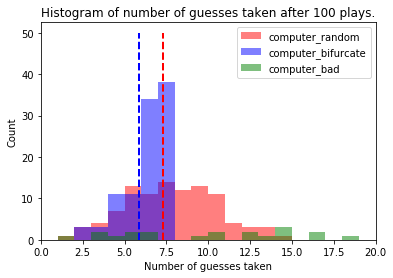

In [7]:
colors = ['r', 'b', 'g']
for method_number in range(len(methods)):
    plt.hist(nguesses[method_number,  :], bins = range(20), alpha = 0.5, label = methods[method_number], color  = colors[method_number])
    plt.plot([mean_nguesses[method_number], mean_nguesses[method_number]], [0, Nrepeats/2], color  = colors[method_number], linestyle = '--', linewidth=2)
plt.legend()
plt.title("Histogram of number of guesses taken after " + str(Nrepeats) +  " plays.")
plt.xlabel("Number of guesses taken")
plt.ylabel("Count")
plt.xlim([0,20])
plt.show()

Here we have played the game many times and each time counted how many guesses it took until the computer guessed correctly. This is plotted in the histogram above. The dashed line represents the average (mean) number of guesses it tool.

The different methods have different results with the bifurcation method clearly outperfoming the other two methods. Now let's use a genetic algorithm to let the computer decide a method for itself.

## Genetic approach

We can define a method for this game by a list of ratios, $$\text{method}= [r_1, r_2, r_3, ...],$$ where $r_i$ is just a random number between 0 and 1. For the $i$th guess when asked to choose a number between the upper bound, $u$, and the lower bound, $l$, the computer will choose $$\text{guess}_i = l + r_i(u - l).$$

Here is an example of how the method will run



In [8]:
game = HOL.Game()
game.method = [0.5, 0.01, 0.75]
game.playGame()

Pick a number between 1 and 100:
50
Nope. You need to go lower.
Pick a number between 1 and 49:
1
Nope. You need to go higher.
Pick a number between 2 and 49:
37
Nope. You need to go lower.
Pick a number between 2 and 36:
QUIT


When the method is out of guesses it quits the game. 

Clearly for the bifurcation method $r_i = 0.5,  \  \forall \  i$ and for the random method $r_i$ is random. In our genetic algorithm we will start from the random method and see if it will evolve into the superior bifurcation method. Here are the steps:

1. Our first generation of methods has a population size of 100 and each method in the population consists of a single random guess.
2. We play the Higher or Lower game 100 times with each method and define the fitness of the method as the mean distance away from the target number -- here we expect guesses around $r_i = 0.5$ to do the best.
3. We select the top 20 methods to proceed and evolve them into a subsequent generation of 100 methods. The evolution proceeds via:
- mutating:  $r_i$ is multiplied by a random number x
- growing/shrinking: the method gains or loses an element. 
- mating: two methods are spliced creating two offspring
- survival: some methods proceed without change. 
4. The process is repeated with this new generation.

In [9]:
game = HOL.Game()
game.narrate = "False" # this turns off the commentary

Ngenerations = 10
Nrepeats = 10
Npop = 10
methods = []
for i in range(Npop):
    methods.append(np.random.rand(1,20))
    
nguesses = np.zeros((Npop, Nrepeats))  # store our guesses here.

for ngen in range(Ngenerations):
    # play game with methods
    for method_number, method in enumerate(methods):
        game.method = method
        for i in range(Nrepeats):
            game.playGame()
            nguesses[ngen, method_number, i] = len(game.guesses) 
            game.reset()
    # evolve

mean_nguesses = np.mean(nguesses, 2)

C:\Users\Jacob\Dropbox\Not Syncing\gameClassPractice.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.method == "human":
C:\Users\Jacob\Dropbox\Not Syncing\gameClassPractice.py:93: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.method == "computer_random":   # randomly guesses within bounds
C:\Users\Jacob\Dropbox\Not Syncing\gameClassPractice.py:97: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.method == "computer_bifurcate":  # picks a number halfway between bounds
C:\Users\Jacob\Dropbox\Not Syncing\gameClassPractice.py:101: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.method == "computer_bad":  #just picks the lower boun

TypeError: type numpy.ndarray doesn't define __round__ method

In [ ]:
type(np.random.rand(1,2))

In [ ]:
# show method improving from random to bifurcate. 